# Graphical information display

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
pd.read_csv('mortalita_per_territorio_2023-09-19.csv')

type_disease  qty_male  qty_female  \
0            alcune malattie infettive e parassitarie    6409.0      7377.0   
1                                         tubercolosi     140.0        88.0   
2                              aids (malattia da hiv)     305.0        84.0   
3                                      epatite virale     883.0       853.0   
4             altre malattie infettive e parassitarie    5081.0      6352.0   
..                                                ...       ...         ...   
85                             di cui altri accidenti    5105.0      6752.0   
86                suicidio e autolesione intenzionale    2923.0       789.0   
87                              omicidio, aggressione     135.0        91.0   
88                    eventi di intento indeterminato       8.0         4.0   
89  altre cause esterne di traumatismo e avvelenam...     222.0       250.0   

    qty_total flag_subtree  
0     13786.0            Y  
1       228.0            N  
2       389.0            N  
3      1736.0            N  
4     11433.0            N  
..        ...          ...  
85    11857.0            N  
86     3712.0            N  
87      226.0            N  
88       12.0            N  
89      472.0            N  

[90 rows x 5 columns]

In [41]:
df = pd.read_csv('mortalita_per_territorio_2023-09-19.csv')
df = df[df['flag_subtree']=='N']
df

type_disease  qty_male  qty_female  \
1                                         tubercolosi     140.0        88.0   
2                              aids (malattia da hiv)     305.0        84.0   
3                                      epatite virale     883.0       853.0   
4             altre malattie infettive e parassitarie    5081.0      6352.0   
7   di cui tumori maligni delle labbra, cavità ora...    2050.0      1061.0   
..                                                ...       ...         ...   
85                             di cui altri accidenti    5105.0      6752.0   
86                suicidio e autolesione intenzionale    2923.0       789.0   
87                              omicidio, aggressione     135.0        91.0   
88                    eventi di intento indeterminato       8.0         4.0   
89  altre cause esterne di traumatismo e avvelenam...     222.0       250.0   

    qty_total flag_subtree  
1       228.0            N  
2       389.0            N  
3      1736.0            N  
4     11433.0            N  
7      3111.0            N  
..        ...          ...  
85    11857.0            N  
86     3712.0            N  
87      226.0            N  
88       12.0            N  
89      472.0            N  

[73 rows x 5 columns]

In [9]:
df_flag = pd.read_csv('mortalita_per_territorio_FY_2023-09-19.csv')
df_flag

type_disease  qty_male  qty_female  \
0            alcune malattie infettive e parassitarie    6409.0      7377.0   
1                                              tumori   97867.0     79991.0   
2                                      tumori maligni   92777.0     75436.0   
3      malattie endocrine, nutrizionali e metaboliche   15225.0     18360.0   
4                 disturbi psichici e comportamentali    8850.0     18121.0   
5   malattie del sistema nervoso e degli organi di...   14539.0     18625.0   
6                   malattie del sistema circolatorio   98850.0    128500.0   
7                       malattie ischemiche del cuore   34095.0     29857.0   
8                   malattie del sistema respiratorio   30623.0     26490.0   
9      malattie croniche delle basse vie respiratorie   13677.0     10549.0   
10                   malattie dell'apparato digerente   11655.0     11308.0   
11  malattie del sistema osteomuscolare e del tess...    1096.0      2776.0   
12              malattie dell'apparato genitourinario    6643.0      7582.0   
13  sintomi, segni, risultati anomali e cause mal ...   10084.0     14904.0   
14                                           Covid-19   44163.0     34510.0   
15       cause esterne di traumatismo e avvelenamento   13614.0     10920.0   
16                                          accidenti   10326.0      9786.0   

    qty_total flag_subtree  
0     13786.0            Y  
1    177858.0            Y  
2    168213.0            Y  
3     33585.0            Y  
4     26971.0            Y  
5     33164.0            Y  
6    227350.0            Y  
7     63952.0            Y  
8     57113.0            Y  
9     24226.0            Y  
10    22963.0            Y  
11     3872.0            Y  
12    14225.0            Y  
13    24988.0            Y  
14    78673.0            Y  
15    24534.0            Y  
16    20112.0            Y

#### Information about the first dataframe with flag != Y

In [92]:
def graph_flag_n (data_frame):
    plt.figure(figsize=(58, 100)) 
    sns.set_style('whitegrid')  # Background style

    sns.barplot(x='qty_total', y='type_disease', data=data_frame)
    sns.set_palette('Set1')     
    sns.set_context('notebook', font_scale=4.6)  

    #label_pers = range(0, 227350, 5000)  # Starts at 0, ends at 1000, increment of 100
    #pos_label = range(len(label_pers))

    plt.title('Distribution of types of diseases according to their mortality.')
    plt.ylabel('Type of disease')
    plt.xlabel('Quantity')

    #plt.xticks(pos_label, label_pers)
    plt.show()

#### Information about the first dataframe with flag = Y

In [93]:
def graph_flag_y(data_frame):
    plt.figure(figsize=(58, 100)) 
    sns.set_style('whitegrid')  # Background style

    sns.barplot(x='qty_total', y='type_disease', data=data_frame)
    sns.set_palette('Set1')     
    sns.set_context('notebook', font_scale=5.6)  

    plt.title('Distribution of disease categories according to their quantity')
    plt.ylabel('Type of disease')
    plt.xlabel('Quantity')

    plt.show()

#### Information about the first dataframe with flag = Y and xlabel male and female

In [102]:
def graph_flag_y_separeted_sex(data_frame):
    # To modify the data frame and reorganize into female and male rows
    df_flag_single = data_frame.drop(columns=['qty_total','flag_subtree'])
    df_melted = df_flag_single.melt(id_vars=['type_disease'], var_name='sex', value_name='quantity')
    sns.set_theme(style="whitegrid")

    # Draw a nested barplot by types and sex
    g = sns.catplot(
        data=df_melted, kind="bar",
        x="type_disease", y="quantity", hue="sex",
        errorbar="sd", palette="YlGnBu", alpha=.7, height=10
    )

    g.despine(left=True)
    g.set_axis_labels("", "Mortality rate (Qty)")
    g.legend.set_title("")
    
    plt.title('Distribution of disease categories by number of deaths by gender')
    plt.xticks(rotation=90)


In [97]:
graph_flag_n(df)

In [99]:
graph_flag_y(df_flag)

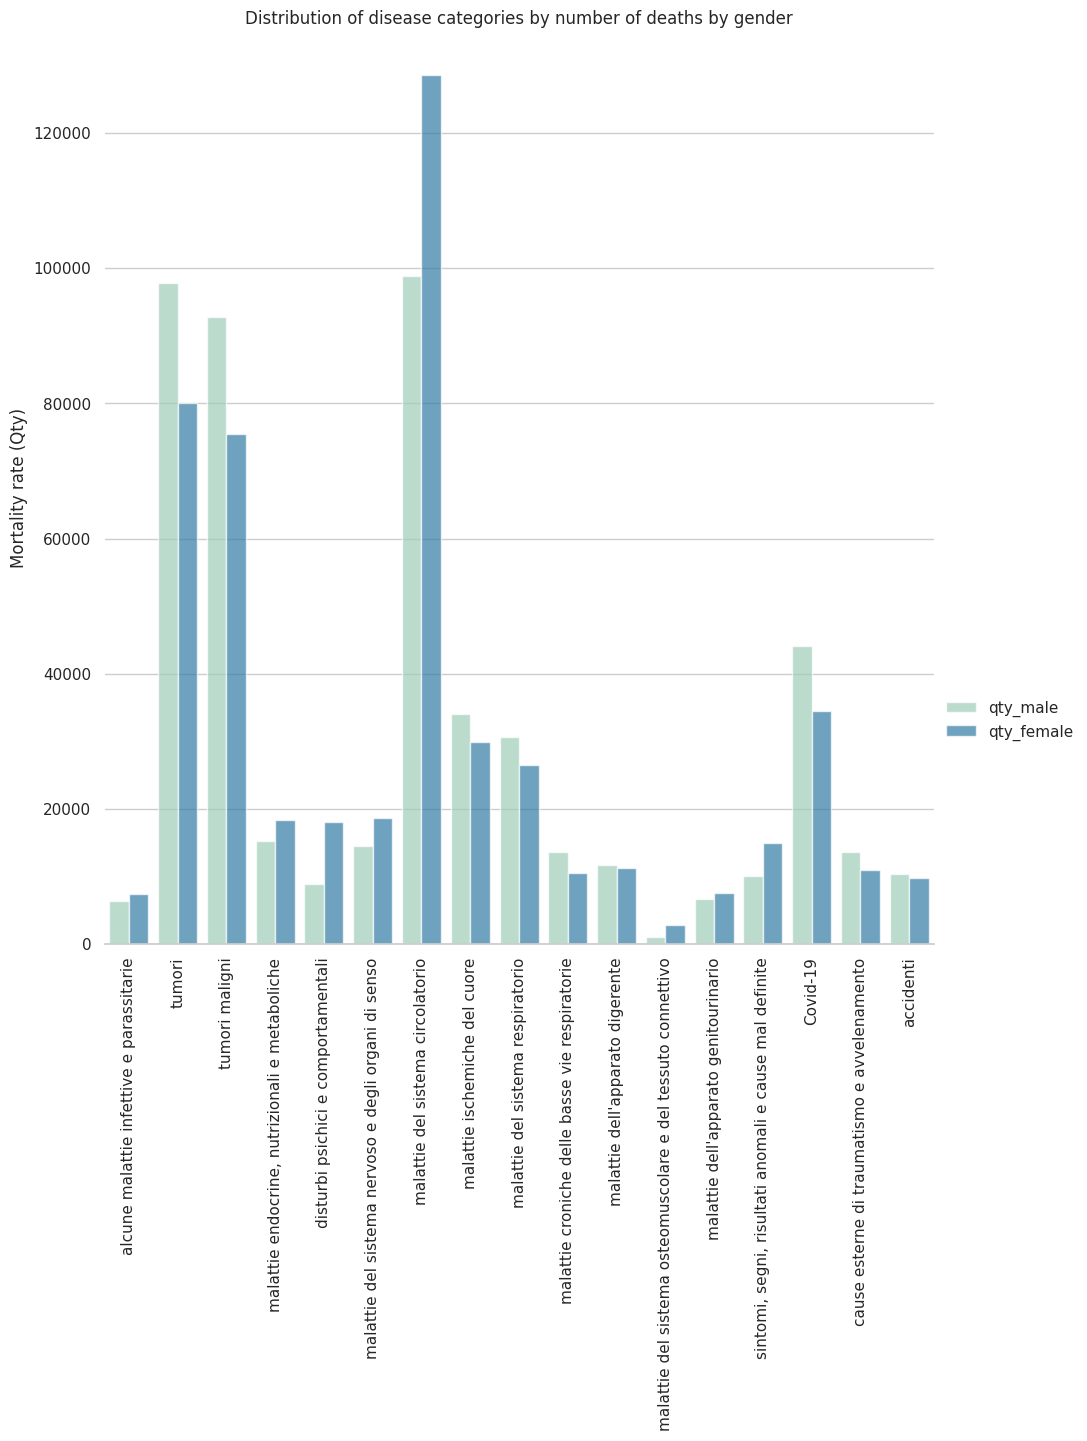

In [104]:
graph_flag_y_separeted_sex(df_flag)